D208 - Predictive Modeling - Task 2

By Krista Moik

In [2]:
#import packages, as suggested in WGU course materials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
#Load medical_clean CSV
df=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D208/medical_clean.csv')

In [4]:
#View data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#check for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


Confirmed there are no duplicates

In [6]:
#check for null values - even though view of data indicates no nulls
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

Confirmed no nulls in the data set

In [7]:
#statistically describe dependent variable - ReAdmis
df.ReAdmis.describe()

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

In [9]:
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

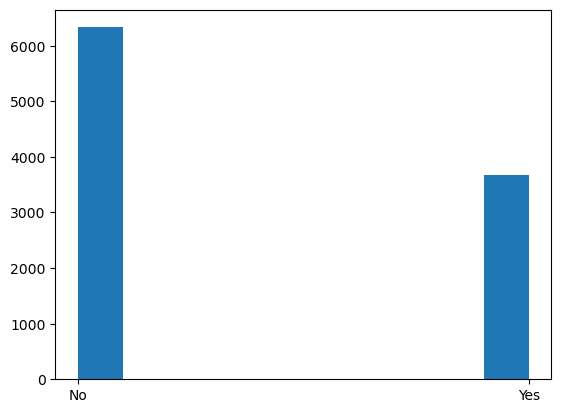

In [10]:
plt.hist(df['ReAdmis'])
plt.show()

In [11]:
#Statistically describe independent variable - Children
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [12]:
df.Children.value_counts()

Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: count, dtype: int64

<Axes: xlabel='Children'>

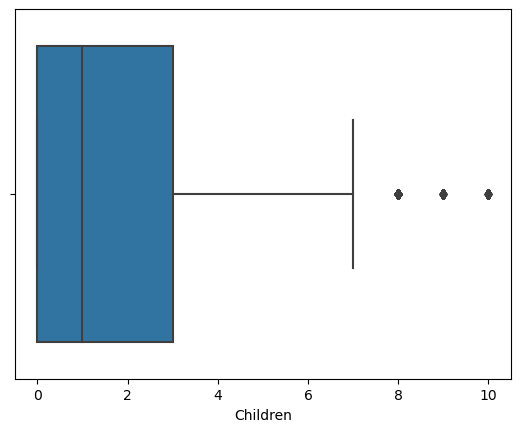

In [13]:
sns.boxplot(df, x='Children')

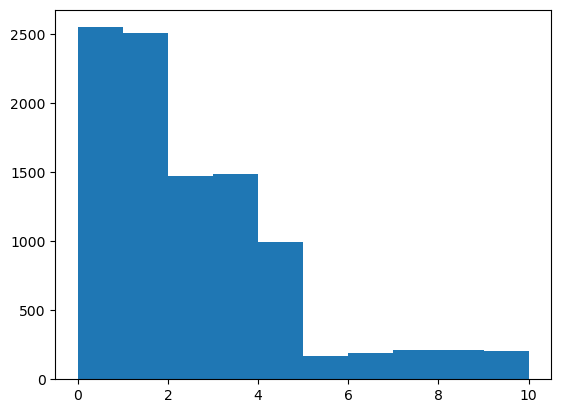

In [14]:
plt.hist(df['Children'])
plt.show()

In [15]:
#Statistically describe independent variable - Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

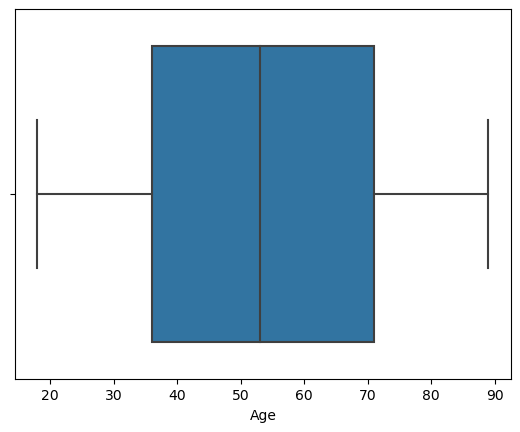

In [16]:
sns.boxplot(df, x='Age')

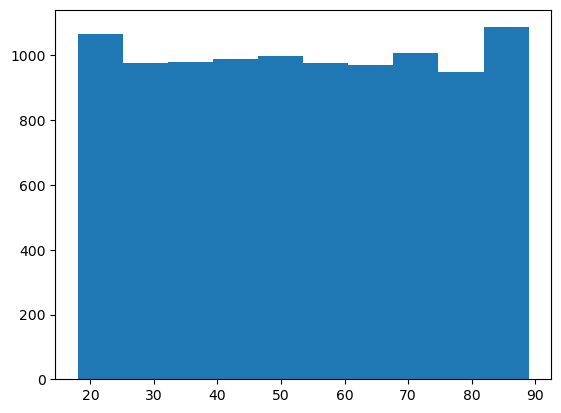

In [17]:
plt.hist(df['Age'])
plt.show()

In [18]:
#Statistically describe independent variable - Income
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

<Axes: xlabel='Income'>

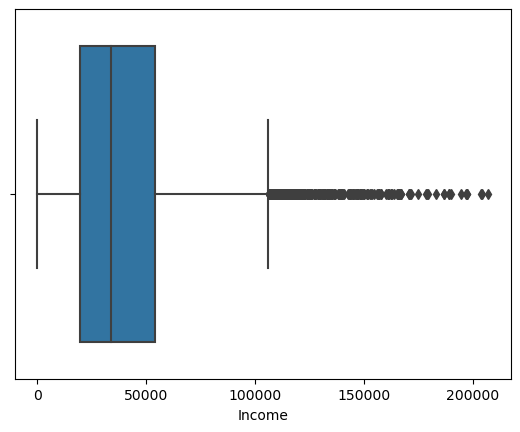

In [19]:
sns.boxplot(df, x='Income')

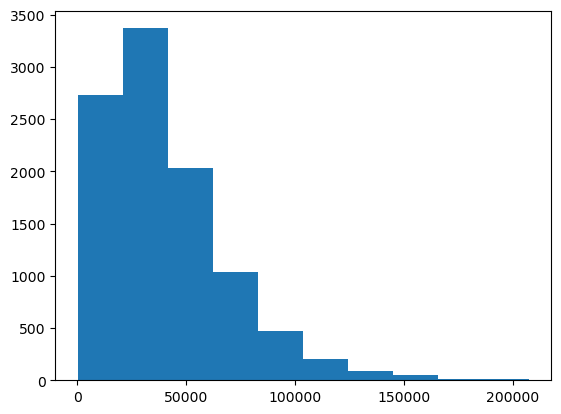

In [20]:
plt.hist(df['Income'])
plt.show()

In [21]:
#Statistically describe independent variable - Marital
df.Marital.describe()

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object

In [22]:
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

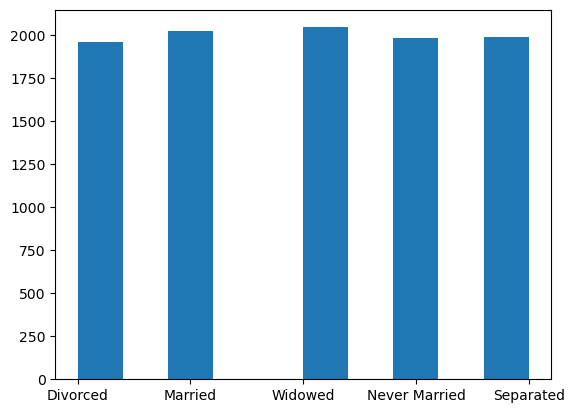

In [23]:
#unable to create boxplot for categorical data
plt.hist(df['Marital'])
plt.show()

In [24]:
#Statistically describe independent variable - Gender
df.Gender.describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

In [25]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

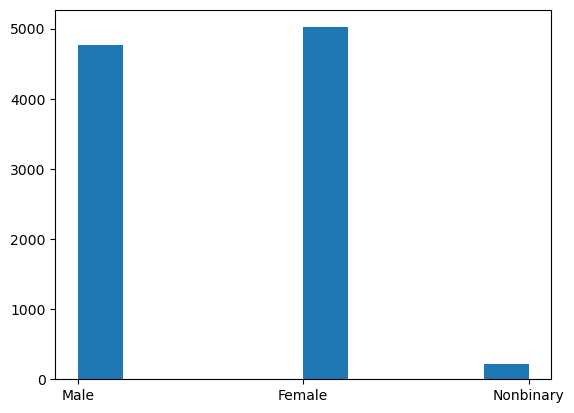

In [26]:
#unable to create boxplot for categorical data
plt.hist(df['Gender'])
plt.show()

In [27]:
#Statistically describe independent variable - Doc_visits
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [28]:
df.Doc_visits.value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

<Axes: xlabel='Doc_visits'>

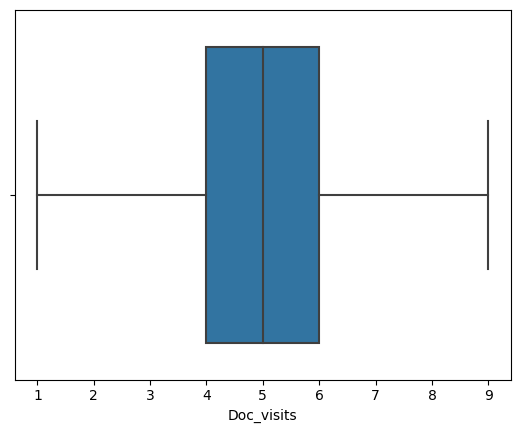

In [29]:
sns.boxplot(df, x='Doc_visits')

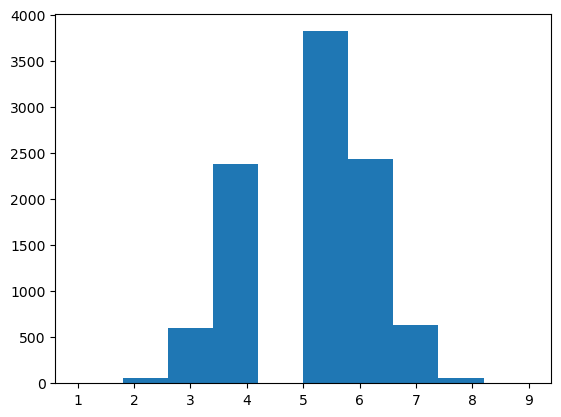

In [30]:
plt.hist(df['Doc_visits'])
plt.show()

In [31]:
#Statistically describe independent variable - Initial_admin
df.Initial_admin.describe()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object

In [32]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

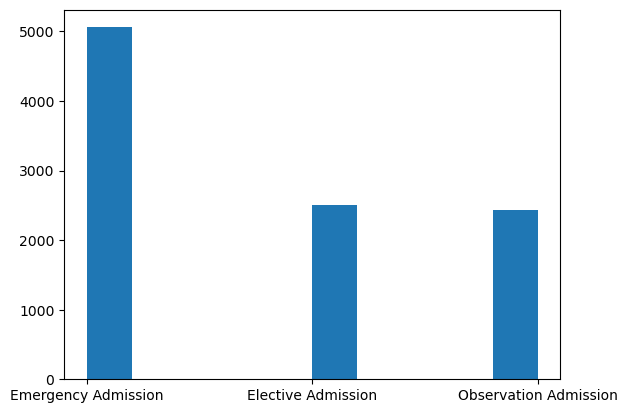

In [33]:
#unable to create boxplot for categorical data
plt.hist(df['Initial_admin'])
plt.show()

In [34]:
#Statistically describe independent variable - HighBlood
df.HighBlood.describe()

count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object

In [35]:
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

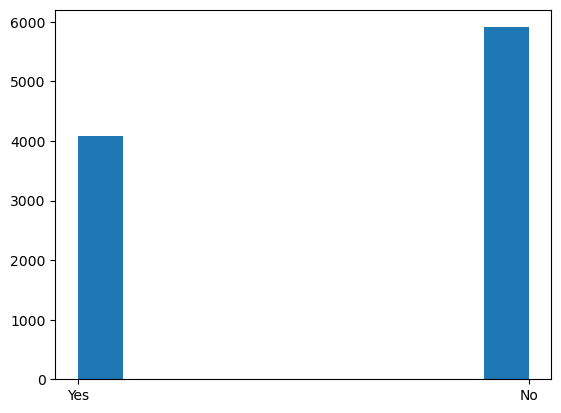

In [36]:
#unable to create boxplot for categorical data
plt.hist(df['HighBlood'])
plt.show()

In [37]:
#Statistically describe independent variable - Stroke
df.Stroke.describe()

count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object

In [38]:
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

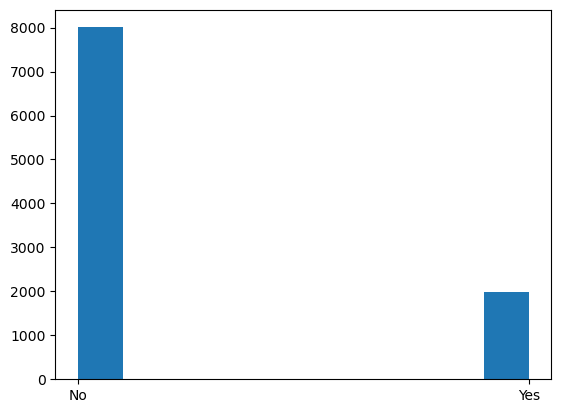

In [39]:
#unable to create boxplot for categorical data
plt.hist(df['Stroke'])
plt.show()

In [40]:
#Statistically describe independent variable - Complication_risk
df.Complication_risk.describe()

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

In [41]:
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

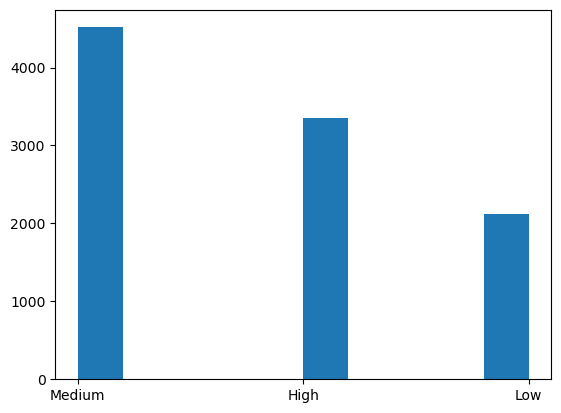

In [42]:
#unable to create boxplot for categorical data
plt.hist(df['Complication_risk'])
plt.show()

In [43]:
#Statistically describe independent variable - Overweight
df.Overweight.describe()

count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object

In [44]:
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

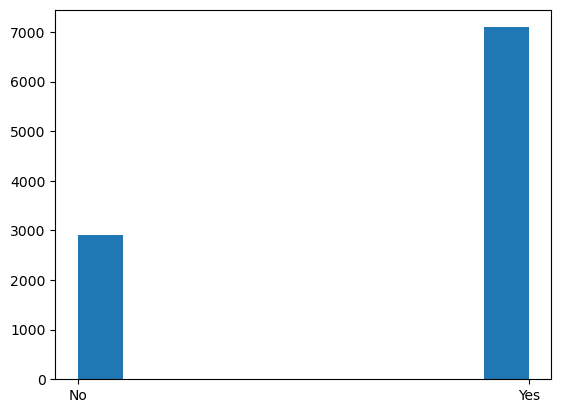

In [45]:
#unable to create boxplot for categorical data
plt.hist(df['Overweight'])
plt.show()

In [46]:
#Statistically describe independent variable - Diabetes
df.Diabetes.describe()

count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object

In [47]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

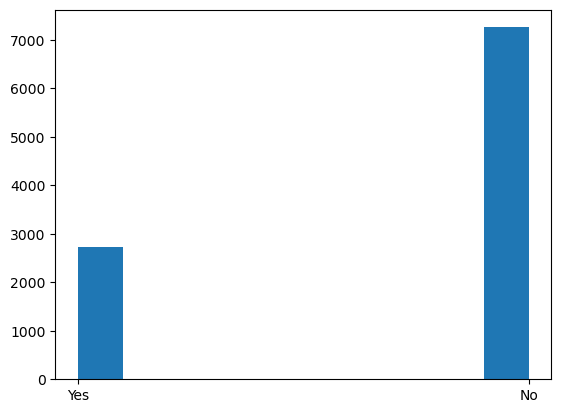

In [48]:
#unable to create boxplot for categorical data
plt.hist(df['Diabetes'])
plt.show()

In [49]:
#Statistically describe independent variable - Anxiety
df.Anxiety.describe()

count     10000
unique        2
top          No
freq       6785
Name: Anxiety, dtype: object

In [50]:
df.Anxiety.value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

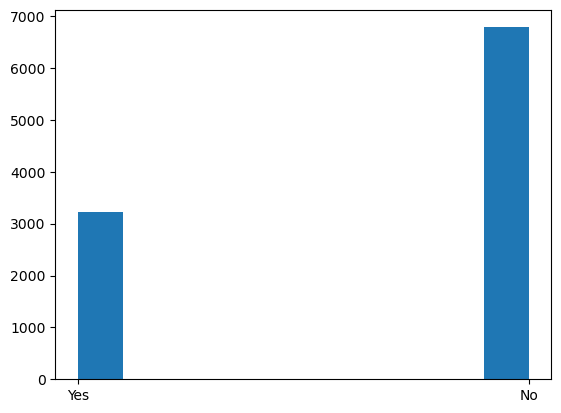

In [51]:
#unable to create boxplot for categorical data
plt.hist(df['Anxiety'])
plt.show()

In [52]:
#Statistically describe independent variable - Initial_days
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [53]:
df.Initial_days.value_counts()

Initial_days
63.544320    2
67.421390    2
70.325420    2
63.334690    1
67.036510    1
            ..
5.977596     1
5.799041     1
6.415853     1
7.328631     1
70.850590    1
Name: count, Length: 9997, dtype: int64

<Axes: xlabel='Initial_days'>

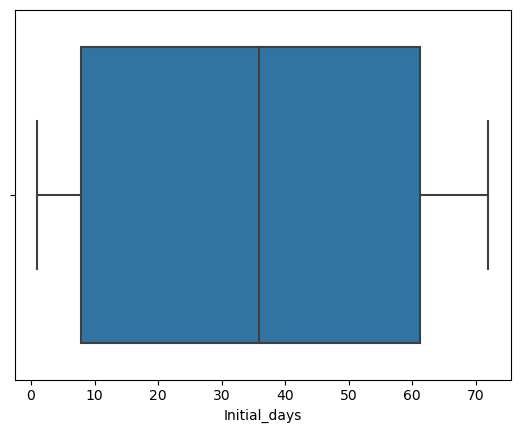

In [54]:
sns.boxplot(df, x='Initial_days')

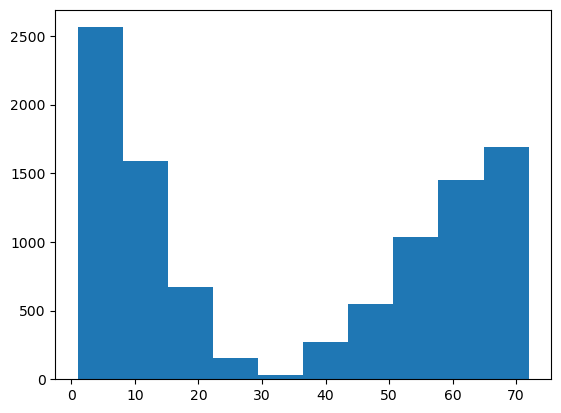

In [55]:
plt.hist(df['Initial_days'])
plt.show()

In D206, I kept all outliers as reasonable.  Confirmed the data has not changed between courses.  I stand by my decision to retain all outliers as I find them reasonable within this data set.

C3: Bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

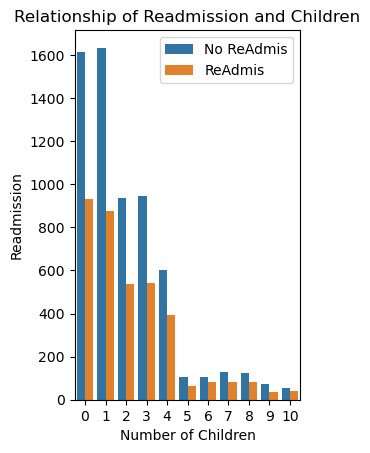

In [56]:
#Bivariate exploration of ReAdmis and Children using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Children")
sns.countplot(data = df, x="Children", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Number of Children")
plt.ylabel("Readmission");

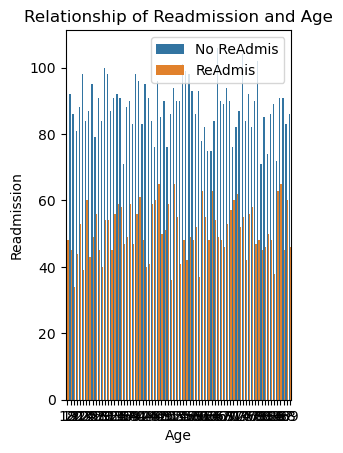

In [57]:
#Bivariate exploration of ReAdmis and Age using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Age")
sns.countplot(data = df, x="Age", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Age")
plt.ylabel("Readmission");

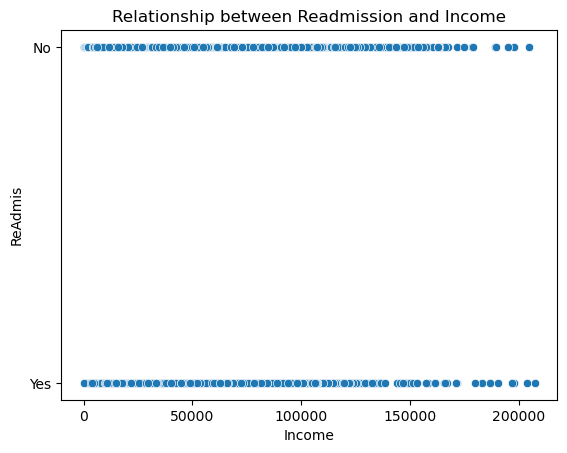

In [58]:
#Bivariate visualization of Readmis and Income using scatterplots
sns.scatterplot(x='Income', y='ReAdmis', data=df).set(title="Relationship between Readmission and Income")
plt.show()

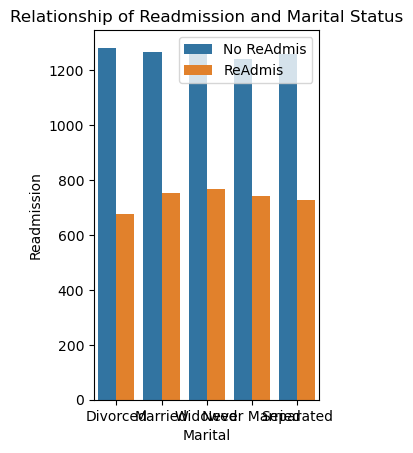

In [59]:
#Bivariate exploration of ReAdmis and Marital Status using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Marital Status")
sns.countplot(data = df, x="Marital", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Marital")
plt.ylabel("Readmission");

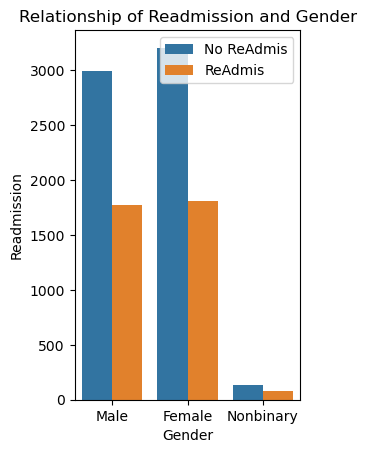

In [60]:
#Bivariate exploration of ReAdmis and Gender using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Gender")
sns.countplot(data = df, x="Gender", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Gender")
plt.ylabel("Readmission");

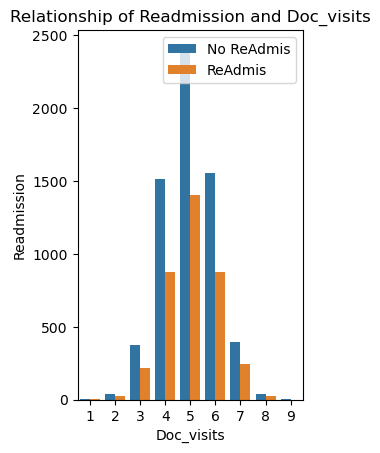

In [61]:
#Bivariate exploration of ReAdmis and Doc_visits using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Doc_visits")
sns.countplot(data = df, x="Doc_visits", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Doc_visits")
plt.ylabel("Readmission");

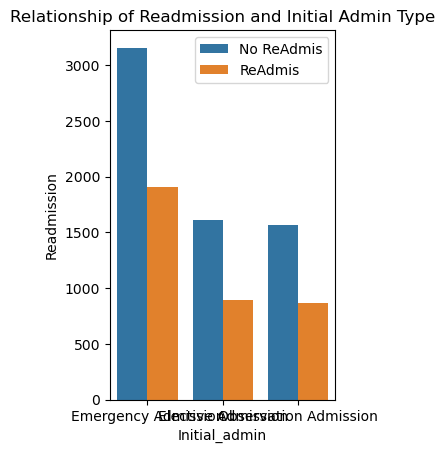

In [62]:
#Bivariate exploration of ReAdmis and Initial_admin using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Initial Admin Type")
sns.countplot(data = df, x="Initial_admin", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Initial_admin")
plt.ylabel("Readmission");

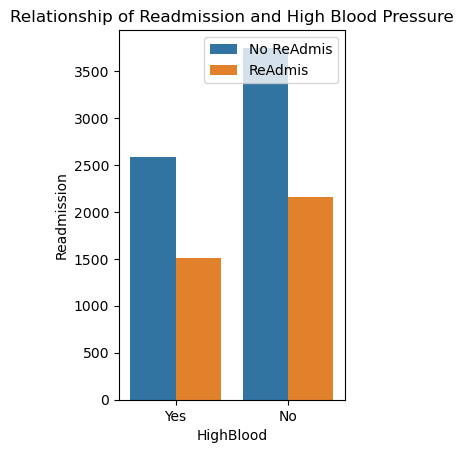

In [63]:
#Bivariate exploration of ReAdmis and HighBlood using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and High Blood Pressure")
sns.countplot(data = df, x="HighBlood", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("HighBlood")
plt.ylabel("Readmission");

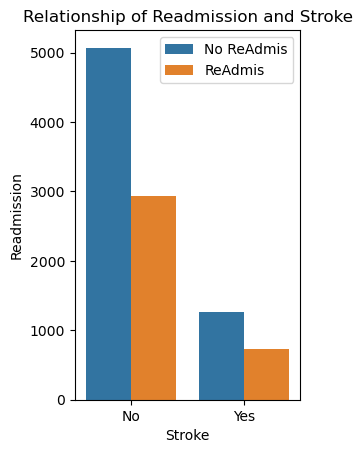

In [64]:
#Bivariate exploration of ReAdmis and Stroke using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Stroke")
sns.countplot(data = df, x="Stroke", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Stroke")
plt.ylabel("Readmission");

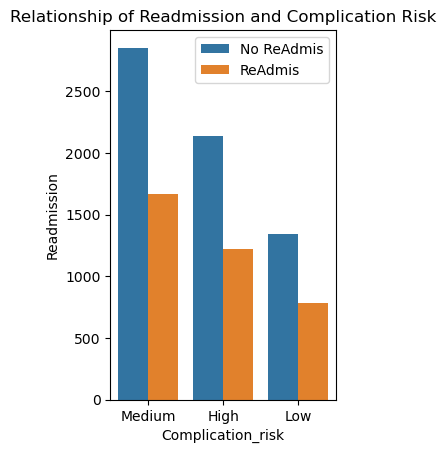

In [65]:
#Bivariate exploration of ReAdmis and Complication_risk using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Complication Risk")
sns.countplot(data = df, x="Complication_risk", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Complication_risk")
plt.ylabel("Readmission");

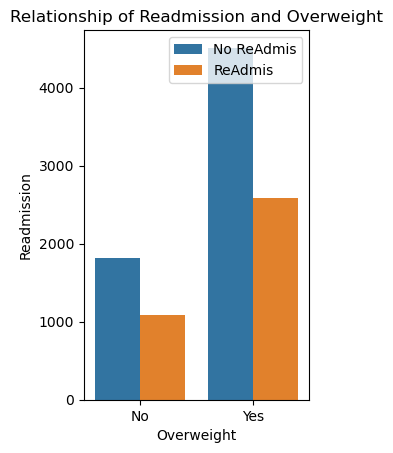

In [66]:
#Bivariate exploration of ReAdmis and Overweight using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Overweight")
sns.countplot(data = df, x="Overweight", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Overweight")
plt.ylabel("Readmission");

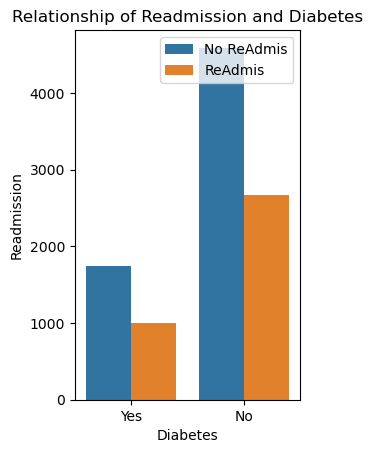

In [67]:
#Bivariate exploration of ReAdmis and Diabetes using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Diabetes")
sns.countplot(data = df, x="Diabetes", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Diabetes")
plt.ylabel("Readmission");

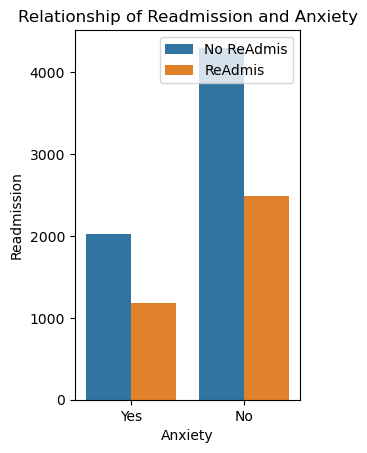

In [68]:
#Bivariate exploration of ReAdmis and Anxiety using Countplot
plt.subplot(1, 2, 2)
plt.title("Relationship of Readmission and Anxiety")
sns.countplot(data = df, x="Anxiety", hue="ReAdmis")
plt.legend(["No ReAdmis", "ReAdmis"])
plt.xlabel("Anxiety")
plt.ylabel("Readmission");

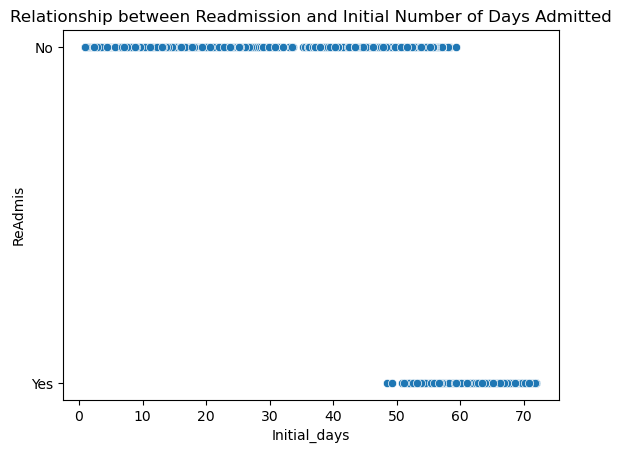

In [69]:
#Bivariate visualization of ReAdmis and Initial_days using scatterplots
sns.scatterplot(x='Initial_days', y='ReAdmis', data=df).set(title="Relationship between Readmission and Initial Number of Days Admitted")
plt.show()

Re-Expression of Categorical Values

In [70]:
#re-expressing ReAdmis
df['ReAdmis_numeric']=df['ReAdmis']

In [71]:
#set up dictionary
dict_readmis={'ReAdmis_numeric' : {'No':0, 'Yes':1}}

In [72]:
#replace variable's values
df.replace(dict_readmis, inplace=True)

In [73]:
# drop original column
df=df.drop(columns=['ReAdmis'])

In [74]:
#re-expressing Overweight
df['Overweight_numeric']=df['Overweight']

In [75]:
#set up dictionary
dict_overweight={'Overweight_numeric' : {'No':0, 'Yes':1}}

In [76]:
#replace variable's values
df.replace(dict_overweight, inplace=True)

In [77]:
# drop original column
df=df.drop(columns=['Overweight'])

In [78]:
#re-expressing Diabetes
df['Diabetes_numeric']=df['Diabetes']

In [79]:
#set up dictionary
dict_diabetes={'Diabetes_numeric' : {'No':0, 'Yes':1}}

In [80]:
#replace variable's values
df.replace(dict_diabetes, inplace=True)

In [81]:
# drop original column
df=df.drop(columns=['Diabetes'])

In [82]:
#re-expressing Anxiety
df['Anxiety_numeric']=df['Anxiety']

In [83]:
#set up dictionary
dict_anxiety={'Anxiety_numeric' : {'No':0, 'Yes':1}}

In [84]:
#replace variable's values
df.replace(dict_anxiety, inplace=True)

In [85]:
# drop original column
df=df.drop(columns=['Anxiety'])

In [86]:
#re-expressing HighBlood
df['HighBlood_numeric']=df['HighBlood']

In [87]:
#set up dictionary
dict_highblood={'HighBlood_numeric' : {'No':0, 'Yes':1}}

In [88]:
#replace variable's values
df.replace(dict_highblood, inplace=True)

In [89]:
# drop original column
df=df.drop(columns=['HighBlood'])

In [90]:
#re-expressing Stroke
df['Stroke_numeric']=df['Stroke']

In [91]:
#set up dictionary
dict_stroke={'Stroke_numeric' : {'No':0, 'Yes':1}}

In [92]:
#replace variable's values
df.replace(dict_stroke, inplace=True)

In [93]:
# drop original column
df=df.drop(columns=['Stroke'])

In [94]:
#check data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [95]:
#onehot encoding
onehot_encoder = OneHotEncoder(sparse=False)

In [96]:
onehot_encoded=onehot_encoder.fit_transform(df[['Gender', 'Marital', 'Complication_risk', 'Initial_admin']])

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
df_encoded=pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Gender', 'Marital', 'Complication_risk', 'Initial_admin']))

In [98]:
#drop first columns to reduce multicollinearity
df_encoded.drop(['Gender_Female', 'Marital_Divorced', 'Complication_risk_High', 'Initial_admin_Elective Admission'], axis=1, inplace=True)

In [99]:
#merging encoded columns to df
df=pd.concat([df, df_encoded], axis=1)

In [100]:
#check data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [101]:
#drop unused columns
df.drop(['Initial_admin', 'Complication_risk', 'Gender', 'Marital', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Arthritis', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [102]:
#confirm data set has been updated appropriately
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   Doc_visits                           10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   ReAdmis_numeric                      10000 non-null  int64  
 6   Overweight_numeric                   10000 non-null  int64  
 7   Diabetes_numeric                     10000 non-null  int64  
 8   Anxiety_numeric                      10000 non-null  int64  
 9   HighBlood_numeric                    10000 non-null  int64  
 10  Stroke_numeric                       10000 non-null  int64  
 11  Gender_Male                  

In [103]:
clean_df=df.copy(deep=True)

In [104]:
clean_df.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikclean_medical.csv')

Logistic Regression Model - Maximum Likelihood Estimation

In [105]:
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Income", "Doc_visits", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Male", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039465
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9400
Time:                        19:50:27   Log-Likelihood:                -394.65
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0871      0.042

We have a pseudo R squared value of 0.9400, which we can use when we have our reduced model to compare models.  The LLR p-value of 0.00, which is less than 0.05, indicates this is already a useful model

In [106]:
#confusion matrix and accuracy of initial model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression: 0.91
[[1419  185]
 [  49  847]]


C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Several variables have p values greater than the 0.05 alpha value so we will look at reducing our model to only statistically significant variables.  First we will perform VIF to look for multicollinearity.  There is also a note that there could be complete quasi-separation, which we will monitor.

In [107]:
#set independent variable for VIF
X=df[["Children", "Age", "Income", "Doc_visits", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Male", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]]

In [108]:
#VIF dataframe
vif_df=pd.DataFrame()
vif_df["feature"]=X.columns

In [109]:
#calculate VIF for all independent variables
vif_df["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [110]:
print(vif_df)

                                feature        VIF
0                              Children   1.908811
1                                   Age   6.689004
2                                Income   2.891617
3                            Doc_visits  13.063681
4                          Initial_days   2.635161
5                    Overweight_numeric   3.287509
6                       Anxiety_numeric   1.461876
7                      Diabetes_numeric   1.369756
8                     HighBlood_numeric   1.677805
9                        Stroke_numeric   1.243323
10                          Gender_Male   1.906911
11                     Gender_Nonbinary   1.041777
12                      Marital_Married   1.927804
13                Marital_Never Married   1.895149
14                    Marital_Separated   1.905218
15                      Marital_Widowed   1.932970
16                Complication_risk_Low   1.595106
17             Complication_risk_Medium   2.262637
18    Initial_admin_Emergency A

In [111]:
#Doc_visits has a VIF value of 13.06, which is greater than 10 and indicates high multicollinearity.  We will remove Doc_visits from our model:
X=df[["Children", "Age", "Income", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Male", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]]

In [112]:
#VIF dataframe
vif_df=pd.DataFrame()
vif_df["feature"]=X.columns

In [113]:
#calculating VIF for independent variables
vif_df["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [114]:
print(vif_df)

                                feature       VIF
0                              Children  1.880873
1                                   Age  5.758430
2                                Income  2.759933
3                          Initial_days  2.569008
4                    Overweight_numeric  3.127351
5                       Anxiety_numeric  1.451134
6                      Diabetes_numeric  1.357735
7                     HighBlood_numeric  1.657749
8                        Stroke_numeric  1.238293
9                           Gender_Male  1.872013
10                     Gender_Nonbinary  1.040078
11                      Marital_Married  1.848077
12                Marital_Never Married  1.810949
13                    Marital_Separated  1.822964
14                      Marital_Widowed  1.849150
15                Complication_risk_Low  1.567946
16             Complication_risk_Medium  2.204364
17    Initial_admin_Emergency Admission  2.700515
18  Initial_admin_Observation Admission  1.831224


In [115]:
#no other VIF values are greater than 10.  We will no re-view our reduced MLE model:
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Income", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Male", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039471
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9399
Time:                        19:51:54   Log-Likelihood:                -394.71
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0868      0.042

In [116]:
#Our Pseudo R value and LLR p value are unchanged.  We do have several variables with p values greater than the alpha value 0.05.  We will reduce these variables from the model using backward stepwise elimination starting with the highest p value - Gender_Male with p value 0.85
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Income", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039473
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9399
Time:                        19:52:20   Log-Likelihood:                -394.73
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0870      0.042

In [117]:
#I will now remove the next highest p-value from the model - Marital_Separated at 0.707
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Income", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039480
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9399
Time:                        19:52:32   Log-Likelihood:                -394.80
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0862      0.042

In [118]:
#I will now remove the next highest p-value from the model - Income at 0.597
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039494
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9399
Time:                        19:52:40   Log-Likelihood:                -394.94
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0864      0.042

In [119]:
#I will now remove the next highest p-value from the model - Age at 0.556
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039511
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9399
Time:                        19:52:50   Log-Likelihood:                -395.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0865      0.042

In [120]:
#I will now remove the next highest p-value from the model - Marital_Married at 0.48
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Nonbinary", "Marital_Never Married", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039536
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9398
Time:                        19:53:00   Log-Likelihood:                -395.36
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0867      0.042

In [121]:
#I will now remove the next highest p-value from the model - Gender_Nonbinary at 0.441
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Marital_Never Married", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039566
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9398
Time:                        19:53:17   Log-Likelihood:                -395.66
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0886      0.042

In [122]:
#I will now remove the next highest p-value from the model - Marital_Never Married at 0.411
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039600
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9398
Time:                        19:53:27   Log-Likelihood:                -396.00
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0876      0.041

In [123]:
#I will now remove the next highest p-value from the model - Marital_Widowed at 0.358
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039643
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9397
Time:                        19:53:34   Log-Likelihood:                -396.43
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0870      0.041

In [124]:
#I will now remove the next highest p-value from the model - Overweight_numeric at 0.189
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039729
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9396
Time:                        19:53:47   Log-Likelihood:                -397.29
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0888      0.041

In [125]:
#I will now remove the next highest p-value from the model - Complication_risk_Medium at 0.208
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039809
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9394
Time:                        19:54:03   Log-Likelihood:                -398.09
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0925      0.041

In [126]:
#I will now remove the next highest p-value from the model - Diabetes_numeric at 0.068
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Anxiety_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039977
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9392
Time:                        19:54:13   Log-Likelihood:                -399.77
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0915      0.041

In [127]:
#I will now remove the next highest p-value from the model - Initial_admin_Observation Admission at 0.054
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Anxiety_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Initial_admin_Emergency Admission"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.040163
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.9389
Time:                        19:54:31   Log-Likelihood:                -401.63
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Children                              0.0918      0.041      

All of the p-values are now less than the alpha 0.05, indicating these variables are statistically relevant.  Our pseudo R Squared value has decreased slightly to 0.9389.  This indicates the original model predicted slightly more of the variability than the reduced model.

In [128]:
#confusion matrix and accuracy of reduced final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression: 0.98
[[1580   24]
 [  26  870]]


C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
#calculating AIC for initial model
y = df.ReAdmis_numeric
X = df[["Children", "Age", "Income", "Doc_visits", "Initial_days", "Overweight_numeric", "Anxiety_numeric", "Diabetes_numeric", "HighBlood_numeric", "Stroke_numeric", "Gender_Male", "Gender_Nonbinary", "Marital_Married", "Marital_Never Married", "Marital_Separated", "Marital_Widowed", "Complication_risk_Low", "Complication_risk_Medium", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission"]]
X=sm.add_constant(X)
model=sm.OLS(y,X). fit()
print(model.aic)

898.351157515357


In [130]:
#calculating AIC for reduced model
y = df.ReAdmis_numeric
X = df[["Children", "Initial_days", "Anxiety_numeric", "HighBlood_numeric", "Stroke_numeric", "Complication_risk_Low", "Initial_admin_Emergency Admission"]]
X=sm.add_constant(X)
model=sm.OLS(y,X). fit()
print(model.aic)

879.5525237007641
